In [37]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
csv_data = pd.read_csv("./exampleData.csv")
csv_data=csv_data.to_numpy()
csv_data=np.transpose(csv_data)

f=csv_data[0]
z_real=csv_data[1]
z_imag=csv_data[2]

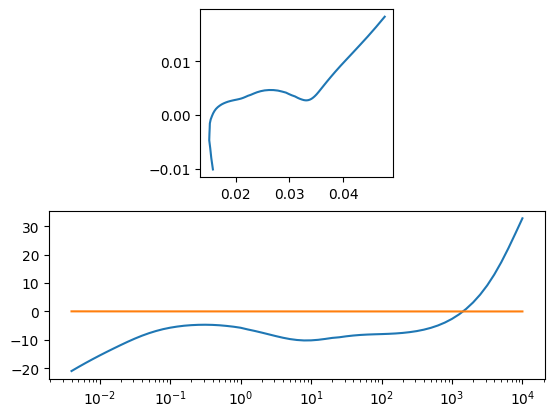

In [44]:
fig, [ax_nyq,ax_bode]= plt.subplots(2,1)
ax_nyq.plot(z_real,-z_imag)
ax_nyq.set_aspect("equal")
ax_bode.plot(f,(180/np.pi)*np.angle(z_real+1j*z_imag))
ax_bode.plot(f,np.abs(z_real+1j*z_imag))
ax_bode.set_xscale("log")

In [50]:
def z_uni_model(freq,p):
    omega=2*np.pi*freq
    R1, Q, alpha = p[0], p[1], p[2]
    z=2*np.sqrt(R1/((omega*1j)**alpha*Q))*(1/(np.tanh(np.sqrt((1j*omega)**alpha*R1*Q))))
    return np.hstack([np.real(z),np.imag(z)])

# z_uni_model(np.array([10,100,1000]),np.array([1000,1e-3,0.9]))

In [52]:
sp.optimize.curve_fit(z_uni_model,f,np.hstack([z_real,z_imag]),p0=np.array([100,1e-4,0.9]))

TypeError: z_uni_model() takes 2 positional arguments but 4 were given

In [ ]:
# R1, R1Q, R2Q, delta1, alpha = p[0], p[1], p[2], p[3], p[4]
# delta2=1-delta1
# k12=R2Q/R1Q
# wc1=1/(R1Q)
# wc2=1/(R2Q)
# S1=np.sqrt((omega*1j)**alpha/wc1)
# S2=np.sqrt((omega*1j)**alpha/wc2)
# C1=1/np.tanh(delta1*S1)
# C2=1/np.tanh(delta2*S2)
# Z=2*(R1)*(C1*C2*S1*k12+S2)/(S1*(C2*S1*k12+C1*S2))

# z_2step_model=Z

In [ ]:
# R1, R1Q, R2Q, R3Q, delta1, delta2, alpha = p[0], p[1], p[2],p[3], p[4], p[5], p[6]
# delta3=1-delta1-delta2
# delta2=delta2
# Q=R1Q/R1
# R2=R2Q/Q
# R3=R3Q/Q
# k12=R2/R1
# k13=R3/R1
# wc1=1/(R1*Q)
# wc2=1/(R2*Q)
# wc3=1/(R3*Q)
# S1=np.sqrt((omega*1j)**alpha/wc1)
# S2=np.sqrt((omega*1j)**alpha/wc2)
# S3=np.sqrt((omega*1j)**alpha/wc3)
# C1=1/np.tanh(delta1*S1)
# C2=1/np.tanh(delta2*S2)
# C3=1/np.tanh(delta3*S3)
# Z=2*(R1)*((S1*S3*C1*k12**2+S2*C2*(S1*C1*C3*k13+S3)*k12+S2**2*C3*k13)/(S1*(S3*S1*k12**2+S2*C2*(S3*C1+S1*C3*k13)*k12+S2**2*C1*C3*k13)))

# z_3step_model=Z